# Análise de dados - FIES
*by: Alexandre Rodrigues* 

O [Fundo de Financiamento Estudantil (FIES)](https://sisfiesportal.mec.gov.br/) é um projeto criado pelo governo federal em meados de 1999 como um programa vinculado ao Ministério da Educação (MEC). 

O intuito do programa é viabilizar o ingresso ao ensino superior através do financiamento da graduação para os estudantes que não tem condições de pagar as mensalidades de faculdades privadas.

Como se trata de um programa que fornece um financiamento estudantil, ao final do curso, o estudante que obteve o benefício deve pagar a dívida.

<center><img alt="Analisando FIES" width="50%" src="fies.png"></center>

## Análise Exploratória de Dados (AED)

`1. Data Source:` Destinada ao carregamento dos dados e carregamento das bibliotecas que serão utilizadas.

`2. Data Cleaning:` Aqui será realizado o tratamento dos dados, verificação de outlier, dados nulos, corrigindo formatos, etc.

`3. Análise de dados demográficos: ` Análise dos dados demográficos com intuito de entender o perfil de quem solicita o financiamento estudantil(FIES).

`4. Conclusão: `

## Fonte dos dados
http://dadosabertos.mec.gov.br/fies/item/148-2021-relatorio-fies-inscricoes-2-2021

# Data Source

In [95]:
#carregando as bibliotecas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns



In [96]:
fies = pd.read_csv('relatorio_inscricao_dados_abertos_fies_22021.csv',sep=';', encoding='latin-1')

In [97]:
fies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237965 entries, 0 to 237964
Data columns (total 57 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Ano do processo seletivo        237965 non-null  int64  
 1   Semestre do processo seletivo   237965 non-null  int64  
 2   ID do estudante                 237965 non-null  int64  
 3   Sexo                            237965 non-null  object 
 4   Data de Nascimento              237965 non-null  object 
 5   UF de residência                237965 non-null  object 
 6   Municipio de residência         237965 non-null  object 
 7   Etnia/Cor                       237965 non-null  object 
 8   Pessoa com deficiência?         237965 non-null  object 
 9   Tipo de escola no ensino médio  237965 non-null  object 
 10  Ano conclusão ensino médio      237965 non-null  int64  
 11  Concluiu curso superior?        237965 non-null  object 
 12  Professor rede p

In [98]:
print(f'O número de linhas do dataset é {fies.shape[0]}.')
print(f'O data set contém {fies.shape[1]} colunas.')

O número de linhas do dataset é 237965.
O data set contém 57 colunas.


In [99]:
fies.columns

Index(['Ano do processo seletivo', 'Semestre do processo seletivo',
       'ID do estudante', 'Sexo', 'Data de Nascimento', 'UF de residência',
       'Municipio de residência', 'Etnia/Cor', 'Pessoa com deficiência?',
       'Tipo de escola no ensino médio', 'Ano conclusão ensino médio',
       'Concluiu curso superior?', 'Professor rede pública ensino?',
       'Nº de membros Grupo Familiar', 'Renda familiar mensal bruta',
       'Renda mensal bruta per capita', 'Região grupo de preferência', 'UF',
       'Cod.Microrregião', 'Microrregião', 'Cod.Mesorregião', 'Mesorregião',
       'Conceito de curso do GP', 'Área do conhecimento',
       'Subárea do conhecimento', 'Cod. do Grupo de preferência',
       'Nota Corte Grupo Preferência', 'Opções de cursos da inscrição',
       'Nome mantenedora', 'Natureza Jurídica Mantenedora',
       'CNPJ da mantenedora', 'Código e-MEC da Mantenedora', 'Nome da IES',
       'Código e-MEC da IES', 'Organização Acadêmica da IES',
       'Município da IES

In [100]:
dataset = fies[['Sexo', 'Etnia/Cor','Pessoa com deficiência?', 'Tipo de escola no ensino médio', 'Renda familiar mensal bruta', 'Renda mensal bruta per capita', 'Nome do curso', 'Turno', 'Média nota Enem']]

Como vou querer realisar uma análise demográfica, é melhor eu filtrar as colunas que tenho maior interesse.

In [101]:
print(f'Após o filtro o número de linhas é {dataset.shape[0]}.')
print(f'Após o filtro o número de colunas é {dataset.shape[1]}.')

Após o filtro o número de linhas é 237965.
Após o filtro o número de colunas é 9.


In [102]:
display(dataset.head())
display(dataset.tail())

,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem
0,M,PARDA,NÃO,SIM,"4253,03","1417,68",DIREITO,NOTURNO,"624,1"
1,M,PARDA,NÃO,SIM,"4253,03","1417,68",DIREITO,MATUTINO,"624,1"
2,M,BRANCA,NÃO,NÃO,NaN,1600,DIREITO,NOTURNO,"701,82"
3,M,BRANCA,NÃO,SIM,"1574,07","787,04",DIREITO,MATUTINO,"598,54"
4,F,BRANCA,NÃO,SIM,2500,"833,33",DIREITO,NOTURNO,"512,16"


,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem
237960,M,BRANCA,NÃO,SIM,1300,"433,33",ENGENHARIA DA COMPUTAÇÃO,NOTURNO,"570,6"
237961,F,PRETA,NÃO,NÃO,NaN,1100,ENGENHARIA DE PRODUÇÃO,NOTURNO,"500,9"
237962,M,BRANCA,NÃO,NÃO,"5922,44","2961,22",ENGENHARIA DE PRODUÇÃO,NOTURNO,"640,08"
237963,F,PARDA,NÃO,SIM,"6517,59","1629,4",PSICOLOGIA,NOTURNO,"535,16"
237964,F,PARDA,NÃO,SIM,"1200,5","400,17",PEDAGOGIA,NOTURNO,"549,94"


In [103]:
dataset.dtypes

Sexo                              object
Etnia/Cor                         object
Pessoa com deficiência?           object
Tipo de escola no ensino médio    object
Renda familiar mensal bruta       object
Renda mensal bruta per capita     object
Nome do curso                     object
Turno                             object
Média nota Enem                   object
dtype: object

Os dados possuem algumas inconsitências, primeiramente podemos notar a presença de Missing Values na nossa base de dados. Além disso, temos o tipo de dado errado para as colunas *Renda familiar mensal bruta*, *Renda mensal bruta per capita* e *Média nota Enem* que estão classificadas como objeto quando deveriam estar como float, e, por fim, os dados dessas colunas mencionadas anteriormente estão separados por *virgula* e não por *ponto* como deveria ser.

# Data Cleaning

In [104]:
colunas = ['Renda familiar mensal bruta','Renda mensal bruta per capita','Média nota Enem']
dataset[colunas] = dataset[colunas].applymap(lambda x: str(x).replace(',','.'))

c:\Users\nrodr\anaconda3\envs\fies_AED\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


O código acima tem o objetivo de tratar a inconsistência do separador, para poder realizar as analises de forma correta devemos trocar a virgula para o ponto.

Então, eu crio uma lista *colunas* e passo como argumento dessa lista as colunas que estão com essa inconsistência, após isso, utilizo a função applymap() junto com a função anônima lambda para aplicar em todas as linhas das colunas da minha lista a função replace() para trocas todas virgulas por ponto.

In [105]:
dataset = dataset.astype({
    'Renda familiar mensal bruta': 'float',
    'Renda mensal bruta per capita': 'float',
    'Média nota Enem': 'float'
})

Agora, realizei o tratamento referente ao tipo dos dados convertendo object -> float para poder realizar as analises posteriores de forma correta

In [106]:
display(dataset.head())
display(dataset.tail())
display(dataset.dtypes)

,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem
0,M,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,NOTURNO,624.10
1,M,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,MATUTINO,624.10
2,M,BRANCA,NÃO,NÃO,NaN,1600.00,DIREITO,NOTURNO,701.82
3,M,BRANCA,NÃO,SIM,1574.07,787.04,DIREITO,MATUTINO,598.54
4,F,BRANCA,NÃO,SIM,2500.00,833.33,DIREITO,NOTURNO,512.16


,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem
237960,M,BRANCA,NÃO,SIM,1300.00,433.33,ENGENHARIA DA COMPUTAÇÃO,NOTURNO,570.60
237961,F,PRETA,NÃO,NÃO,NaN,1100.00,ENGENHARIA DE PRODUÇÃO,NOTURNO,500.90
237962,M,BRANCA,NÃO,NÃO,5922.44,2961.22,ENGENHARIA DE PRODUÇÃO,NOTURNO,640.08
237963,F,PARDA,NÃO,SIM,6517.59,1629.40,PSICOLOGIA,NOTURNO,535.16
237964,F,PARDA,NÃO,SIM,1200.50,400.17,PEDAGOGIA,NOTURNO,549.94


Sexo                               object
Etnia/Cor                          object
Pessoa com deficiência?            object
Tipo de escola no ensino médio     object
Renda familiar mensal bruta       float64
Renda mensal bruta per capita     float64
Nome do curso                      object
Turno                              object
Média nota Enem                   float64
dtype: object

Podemos ver que agora nossos dados estão nos formatos que eu preciso para poder realizar o resto das análises, porém ainda temos os missing values.

Temos alguns tipos de missing values
1. Missing completely values: Esses são quando os valores não dependem de nenhuma outra feature.
2. Missing at random: São quando os valores dependem de alguma feature.
3. Missing not at random: Esses os valores nulos tem alguma razão para estarem assim.

De acordo com os tipos principais, nossos dados entram no primeiro tipo, Missing Completely Values e portanto não dependem de nenhuma feature

In [107]:
dataset.isnull().sum()

Sexo                                  0
Etnia/Cor                             0
Pessoa com deficiência?               0
Tipo de escola no ensino médio        0
Renda familiar mensal bruta       30275
Renda mensal bruta per capita         0
Nome do curso                         0
Turno                                 0
Média nota Enem                       0
dtype: int64

## Porcentagem de missing values

In [108]:
dataset.isnull().sum()/dataset.shape[0]

Sexo                              0.000000
Etnia/Cor                         0.000000
Pessoa com deficiência?           0.000000
Tipo de escola no ensino médio    0.000000
Renda familiar mensal bruta       0.127225
Renda mensal bruta per capita     0.000000
Nome do curso                     0.000000
Turno                             0.000000
Média nota Enem                   0.000000
dtype: float64

In [109]:
#organizando por ordem decrescente
(dataset.isnull().sum().sort_values(ascending=False)/dataset.shape[0])*100

Renda familiar mensal bruta       12.722459
Sexo                               0.000000
Etnia/Cor                          0.000000
Pessoa com deficiência?            0.000000
Tipo de escola no ensino médio     0.000000
Renda mensal bruta per capita      0.000000
Nome do curso                      0.000000
Turno                              0.000000
Média nota Enem                    0.000000
dtype: float64

Podemos notar que 12,72% aproximadamente dos meus dados na coluna *Renda familiar mensal bruta* são NaN. Para minha análise exploratória o tratamento que irei utilizar é a exclusão dos dados por entender que é uma porcentagem baixa devido a quantidade de dados que ainda irá restar.

In [110]:
dataset_clean = dataset.dropna()
dataset_clean.isna().sum()

Sexo                              0
Etnia/Cor                         0
Pessoa com deficiência?           0
Tipo de escola no ensino médio    0
Renda familiar mensal bruta       0
Renda mensal bruta per capita     0
Nome do curso                     0
Turno                             0
Média nota Enem                   0
dtype: int64

Foi criada uma nova variável para armazenar a base de dados que estamos analizando sem os missing values, a nova variável foi criada para não perder a referência do DataFrame.

# Análise dos dados demográficos

In [111]:
display(dataset_clean.head())
display(dataset_clean.tail())

,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem
0,M,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,NOTURNO,624.10
1,M,PARDA,NÃO,SIM,4253.03,1417.68,DIREITO,MATUTINO,624.10
3,M,BRANCA,NÃO,SIM,1574.07,787.04,DIREITO,MATUTINO,598.54
4,F,BRANCA,NÃO,SIM,2500.00,833.33,DIREITO,NOTURNO,512.16
5,F,BRANCA,NÃO,SIM,2500.00,833.33,DIREITO,MATUTINO,512.16


,Sexo,Etnia/Cor,Pessoa com deficiência?,Tipo de escola no ensino médio,Renda familiar mensal bruta,Renda mensal bruta per capita,Nome do curso,Turno,Média nota Enem
237959,F,PARDA,NÃO,SIM,1150.00,383.33,ENGENHARIA DA COMPUTAÇÃO,NOTURNO,462.44
237960,M,BRANCA,NÃO,SIM,1300.00,433.33,ENGENHARIA DA COMPUTAÇÃO,NOTURNO,570.60
237962,M,BRANCA,NÃO,NÃO,5922.44,2961.22,ENGENHARIA DE PRODUÇÃO,NOTURNO,640.08
237963,F,PARDA,NÃO,SIM,6517.59,1629.40,PSICOLOGIA,NOTURNO,535.16
237964,F,PARDA,NÃO,SIM,1200.50,400.17,PEDAGOGIA,NOTURNO,549.94


In [112]:
dataset_clean.nunique()

Sexo                                  2
Etnia/Cor                             5
Pessoa com deficiência?               2
Tipo de escola no ensino médio        3
Renda familiar mensal bruta       25170
Renda mensal bruta per capita     26555
Nome do curso                       254
Turno                                 4
Média nota Enem                   16198
dtype: int64

## Dados categóricos

<AxesSubplot:xlabel='Sexo', ylabel='Total de inscritos'>

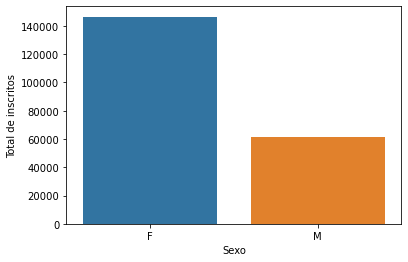

In [113]:
sexo = dataset_clean['Sexo'].value_counts().reset_index()
sexo.columns = ['Sexo', 'Total de inscritos']
sns.barplot(data = sexo, x=sexo['Sexo'], y='Total de inscritos')

<AxesSubplot:xlabel='Etnia/Cor', ylabel='Total de inscritos'>

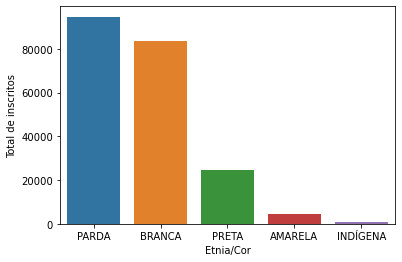

In [114]:
etnia = dataset_clean['Etnia/Cor'].value_counts().reset_index()
etnia.columns = ['Etnia/Cor', 'Total de inscritos']
sns.barplot(data = etnia, x=etnia['Etnia/Cor'], y='Total de inscritos')

<AxesSubplot:xlabel='Pessoa com deficiência?', ylabel='Total de inscritos'>

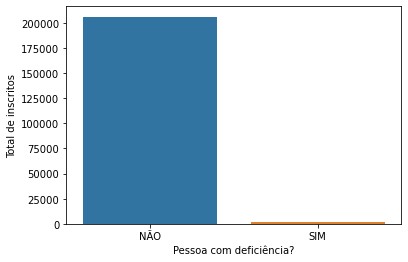

In [115]:
pessoa = dataset_clean['Pessoa com deficiência?'].value_counts().reset_index()
pessoa.columns = ['Pessoa com deficiência?', 'Total de inscritos']
sns.barplot(data = pessoa, x=pessoa['Pessoa com deficiência?'], y='Total de inscritos')

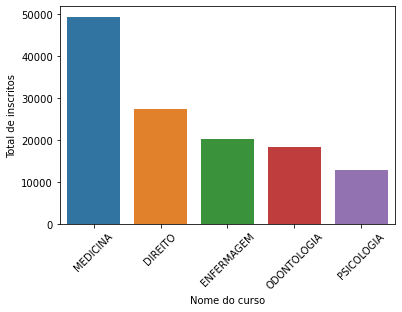

In [118]:
cursos =dataset_clean['Nome do curso'].value_counts().reset_index()
cursos.columns = ['Nome do curso', 'Total de inscritos']
sns.barplot(data=cursos.sort_values('Total de inscritos', ascending=False)[0:5], x=cursos['Nome do curso'][0:5], y=cursos['Total de inscritos'])
plt.xticks(rotation=45);


Podemos notar que o curso de medicina é disparado a graduação mais procurada para financiamento estudantil.

<AxesSubplot:xlabel='Turno', ylabel='Total de inscritos'>

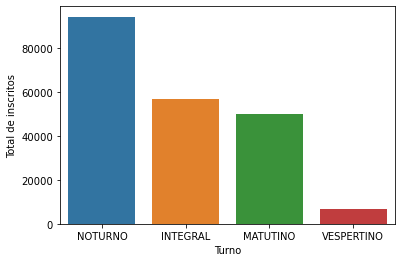

In [117]:
turno = dataset_clean['Turno'].value_counts().reset_index()
turno.columns = ['Turno', 'Total de inscritos']
sns.barplot(data = turno, x=turno['Turno'], y='Total de inscritos')

## Dados numéricos